# **CALCULO DE RISCOS DE UM ATIVO**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as wb

sns.set_style('whitegrid')
%matplotlib inline

In [2]:
tickers = ['PG', 'BEI.DE']

sec_data = pd.DataFrame()

for tick in tickers:
    sec_data[tick] = wb.DataReader(tick, data_source="yahoo",
                                   start='2007-1-1')['Adj Close']



In [3]:
sec_data.head()

,PG,BEI.DE
Date,,
2007-01-03,42.636059,40.627869
2007-01-04,42.312363,40.894630
2007-01-05,41.949009,40.053936
2007-01-08,42.041492,40.062027
2007-01-09,41.935799,39.156666


In [4]:
# Devio padrão dos retornos de uma empresa: RISCO/VOLATILDIADE
# Analisar qual das ações é mais arriscada/volátil
# Calcular o retorno logaritmico de cada uma
sec_returns = np.log(sec_data / sec_data.shift(1))

In [5]:
# Tabela contém o retorno logaritmico de cada uma
sec_returns

,PG,BEI.DE
Date,,
2007-01-03,NaN,NaN
2007-01-04,-0.007621,0.006545
2007-01-05,-0.008624,-0.020772
2007-01-08,0.002202,0.000202
2007-01-09,-0.002517,-0.022858
...,...,...
2021-01-07,-0.009390,-0.006403
2021-01-08,-0.000432,0.007254
2021-01-11,-0.006796,-0.002341


Text(0.5, 1.0, 'PG')

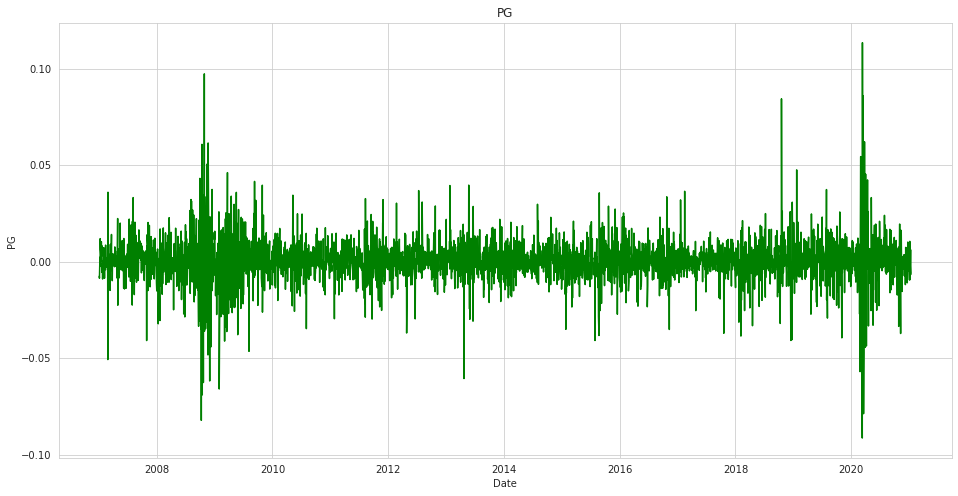

In [6]:
fig = plt.figure(figsize=(16,8))
sns.lineplot(x="Date", y=sec_returns['PG'], data=sec_returns, color='green')
plt.title('PG')

Text(0.5, 1.0, 'BEI.DE')

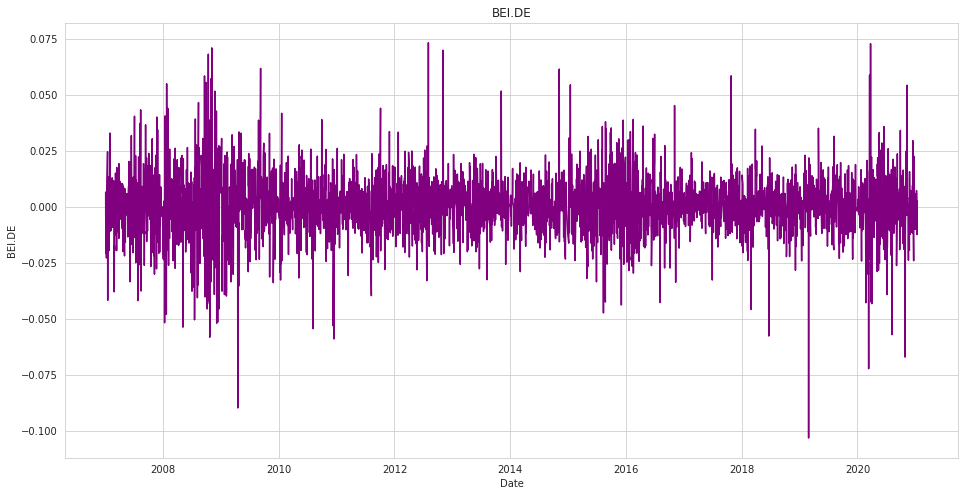

In [7]:
fig = plt.figure(figsize=(16,8))
sns.lineplot(x="Date", y=sec_returns['BEI.DE'], data=sec_returns, color="purple")
plt.title('BEI.DE')

# **CALCULO DA EMPRRESA PG**

In [8]:
# média diária
sec_returns['PG'].mean()

0.0003322793971269441

In [9]:
# média por dias letivos no ano
sec_returns['PG'].mean() * 250

0.08306984928173602

In [10]:
# VOLATILIDADE
# desvio padrão
sec_returns['PG'].std()

0.011871078638958586

In [11]:
# Desvio padrao * dias letivos ** 0.5(raiz quadrada)
sec_returns['PG'].std() * 250 ** 0.5

0.18769823391040394

# **CALCULO DA EMPRESA BEI.DE**

In [12]:
# média
sec_returns['BEI.DE'].mean()

0.00022305281851635913

In [13]:
# média por dias letivos no ano
sec_returns['BEI.DE'].mean() * 250

0.055763204629089784

In [14]:
# VOLATILIDADE
# desvio padrão
sec_returns['BEI.DE'].std()

0.013860210609873743

In [15]:
# Desvio padrao * dias letivos ** 0.5(raiz quadrada)
sec_returns['BEI.DE'].std() * 250 ** 0.5

0.2191491718841624

# **RESULTADOS**

In [16]:
# Comparando Médias
medias = sec_returns[['PG', 'BEI.DE']].mean() * 250
medias

PG        0.083070
BEI.DE    0.055763
dtype: float64

In [17]:
# Comparando Desvios
desvios = sec_returns[['PG', 'BEI.DE']].std() * 250 ** 0.5
desvios

PG        0.187698
BEI.DE    0.219149
dtype: float64

In [18]:
# CONCLUSÕES
# A taxa de retorno da BEI.DE éé ligeiramente maior...
# Entretenato, a BEI.DE também possui uma maior volatilidade 